# Задание 1

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from tqdm import tqdm

## Входные данные

In [3]:
G = 6.67e-11  # гравитационная постоянная, м^3 кг^-1 с^-2
M1 = 2.0e30  # масса тела 1 (звезда), кг
M2 = 6.0e24  # масса тела 2 (планета), кг
M3 = 7.3e22  # масса астероида
R1 = 696340e3  # радиус солнца
R2 = 6378e3  # радиус тела 2 (планета), км
R12 = 150e9  # расстояние между телом 1 и телом 2, км
U2 = 30e3  # начальная скорость тела 2, км/с
R3 = 1737e3  # радиус тела 3 (астероид), км
R23 = 384e6  # расстояние между телом 2 и телом 3, км
U3 = 1.0e3  # начальная скорость тела 3, км/с

## Начальные условия

In [4]:
x2_0 = R1 + R12 + R2  # начальное положение x тела 2
x3_0 = R1 + R12 + 2 * R2 + R23 + R3  # начальное положение x тела 3
y2_0 = 0  # начальное положение y тела 2
y3_0 = 0  # начальное положение y тела 3

vx2_0 = 0  # начальная скорость по x тела 2
vx3_0 = 0  # начальная скорость по x тела 3
vy2_0 = U2  # начальная скорость по y тела 2
vy3_0 = U3 + U2  # начальная скорость по y тела 3

In [5]:
# Функция для расчета расстояний между телами
def r12(x2, y2):
    return np.sqrt(x2 ** 2 + y2 ** 2)


def r13(x3, y3):
    return np.sqrt(x3 ** 2 + y3 ** 2)


def r23(x2, y2, x3, y3):
    return np.sqrt((x3 - x2) ** 2 + (y3 - y2) ** 2)

In [6]:
# Определим систему уравнений
def system(t, y):
    x2, vx2, y2, vy2, x3, vx3, y3, vy3 = y

    # Расстояния между телами
    r_12 = r12(x2, y2)
    r_13 = r13(x3, y3)
    r_23 = r23(x2, y2, x3, y3)

    assert r_12 > 0
    assert r_13 > 0
    assert r_23 > 0

    # Уравнения движения
    ax2 = G * M1 * (-x2) / r_12 ** 3 + G * M3 * (x3 - x2) / r_23 ** 3
    ay2 = G * M1 * (-y2) / r_12 ** 3 + G * M3 * (y3 - y2) / r_23 ** 3

    ax3 = G * M1 * (-x3) / r_13 ** 3 + G * M2 * (x2 - x3) / r_23 ** 3
    ay3 = G * M1 * (-y3) / r_13 ** 3 + G * M2 * (y2 - y3) / r_23 ** 3

    return [vx2, ax2, vy2, ay2, vx3, ax3, vy3, ay3]


In [11]:
y0 = [x2_0, vx2_0, y2_0, vy2_0, x3_0, vx3_0, y3_0, vy3_0]

t_end = 60 * 60 * 24 * 365 * 1000
n = 10000000

dt = t_end / n
dt

3153.6

In [12]:
sol = solve_ivp(system, (0, t_end), y0, method='DOP853', t_eval=np.linspace(0, t_end, n))
len(sol)

11

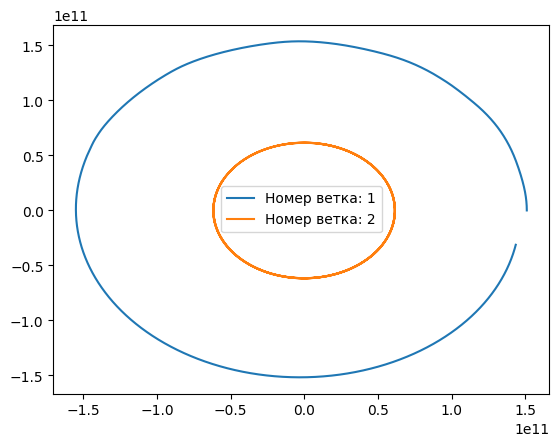

In [14]:
# plt.plot(sol.y[4], sol.y[6], label='Тело 3 (Астероид)')
i = 0
for start, end in [(0, 10), (9990, 10000)]:
    i += 1;
    # plt.figure()
    plt.plot(sol.y[4][start * 1000:end * 1000], sol.y[6][start * 1000:end * 1000], label=f'Номер ветка: {i}')
    plt.legend()
# plt.xlabel('x (м)')
# plt.ylabel('y (м)')
# plt.legend()
# plt.title('Траектории движения тел')
# plt.grid()
# plt.show()